In [1]:
import os
from glob import glob
import numpy  as np
import gdal
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio
import sys
import matplotlib.pyplot as plt

In [2]:
path = os.getcwd()+"\\working_ndvi\\Krishna"
krishna = glob(path+"\\*.tif")
krishna

['C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\working_ndvi\\Krishna\\Krishna20170210.tif',
 'C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\working_ndvi\\Krishna\\Krishna20180302.tif',
 'C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\working_ndvi\\Krishna\\Krishna20190210.tif',
 'C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\working_ndvi\\Krishna\\Krishna20200215.tif']

In [3]:
path = os.getcwd()+"\\working_ndvi\\Godavari"
godavari = glob(path+"\\*.tif")
godavari

['C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\working_ndvi\\Godavari\\Godavari20180225.tif',
 'C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\working_ndvi\\Godavari\\Godavari20190215.tif']

In [4]:
ndpath = os.getcwd() + "\\difference_ndvi\\"
clpath = os.getcwd() + "\\difference_class\\"
if not os.path.exists(ndpath):
    os.mkdir(ndpath)
if not os.path.exists(clpath):
    os.mkdir(clpath)
ksavepath_ndvi = os.getcwd()+"\\difference_ndvi\\Krishna"
gsavepath_ndvi = os.getcwd()+"\\difference_ndvi\\Godavari"
ksavepath = os.getcwd()+"\\difference_class\\Krishna"
gsavepath = os.getcwd()+"\\difference_class\\Godavari"
if not os.path.exists(ksavepath_ndvi):
    os.mkdir(ksavepath_ndvi)
if not os.path.exists(gsavepath_ndvi):
    os.mkdir(gsavepath_ndvi)
if not os.path.exists(ksavepath):
    os.mkdir(ksavepath)
if not os.path.exists(gsavepath):
    os.mkdir(gsavepath)

In [5]:
def readImage(file_path):
    ds = gdal.Open(file_path)
    image = np.array(ds.GetRasterBand(1).ReadAsArray()).astype(float)
    return image

In [6]:
def calculateDifference(y1, y2):
    return y2 - y1

In [7]:
def classifyDifference(y1, y2):
    diff = y2 - y1
    diff = np.where(diff < -0.2, 5, diff)
    diff = np.where(diff < -0.1, 4, diff)
    diff = np.where(diff < 0, 3, diff)
    diff = np.where(diff < 0.2, 2, diff)
    diff = np.where(diff < 0.75, 1, diff)
    return diff

In [8]:
def hist(date, ndvi):
    ep.hist(ndvi,
            figsize=(12, 6),
            title=[date])
    plt.show()

In [9]:
def imMap(date, ndvi):
    ep.plot_bands(ndvi, 
        cmap='Greens',
        scale=False,
        title=date)
    plt.show()

In [10]:
def saveImage(src, savePath, arr):
    with rasterio.Env():
        profile = src.profile
        profile.update(
            dtype=rasterio.float64,
            count=1)
        with rasterio.open(savePath, 'w', **profile) as dst:
            dst.write(arr.astype(rasterio.float64), 1)

In [11]:
kscene = krishna[0]
gscene = godavari[0]

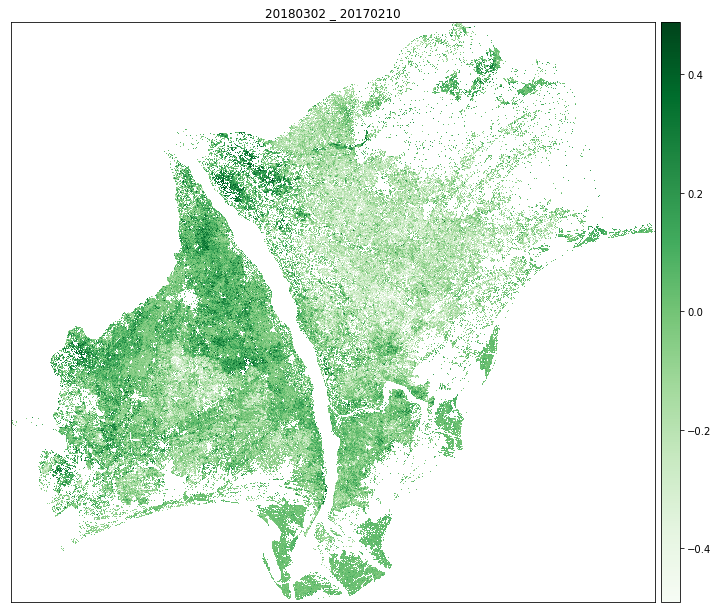

C:\Users\Hello\.conda\envs\pro\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Hello\.conda\envs\pro\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


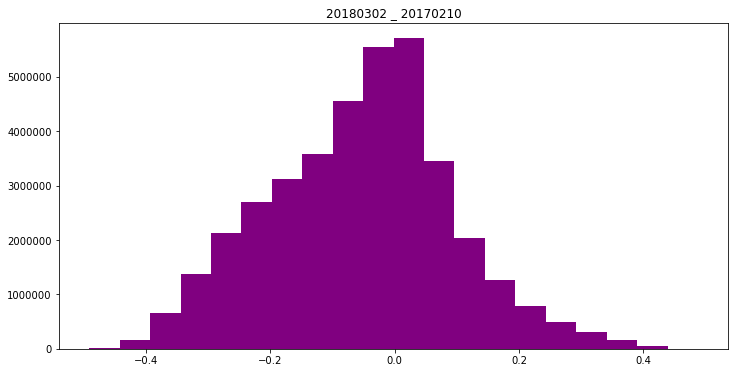

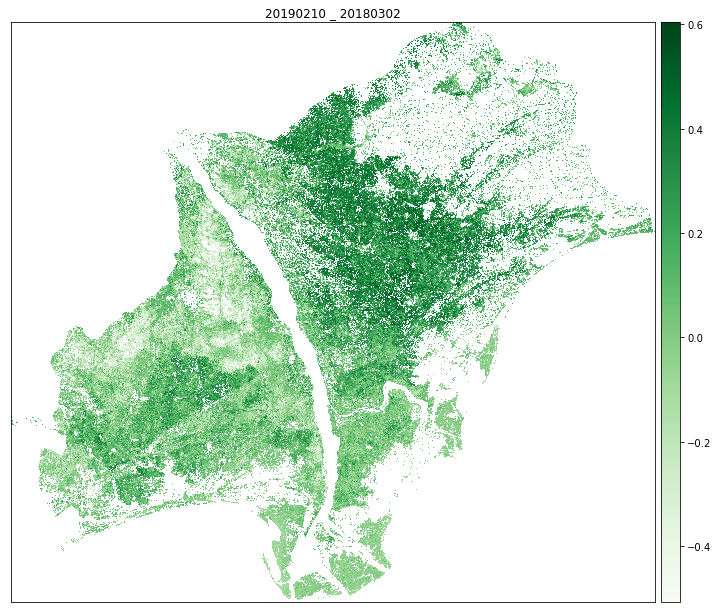

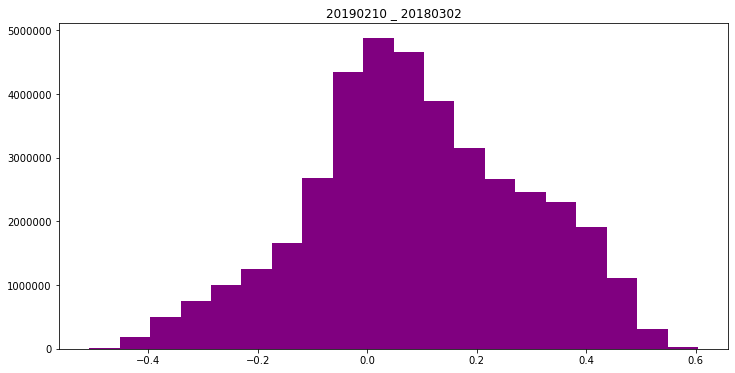

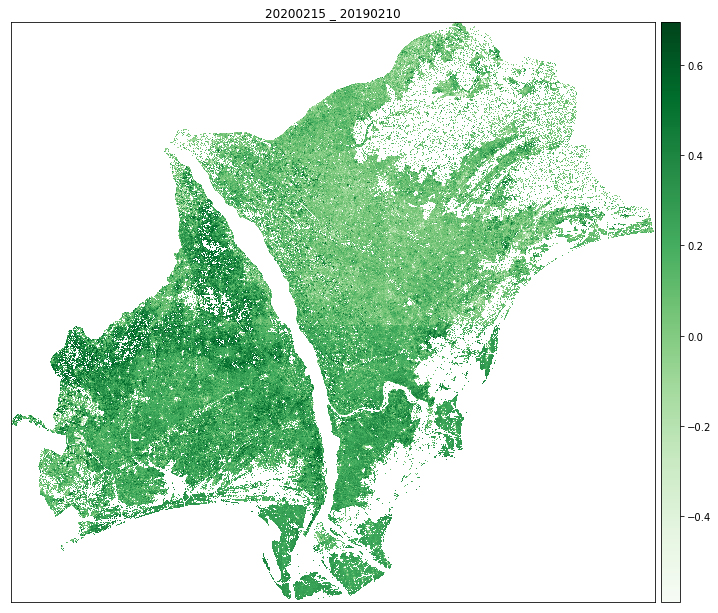

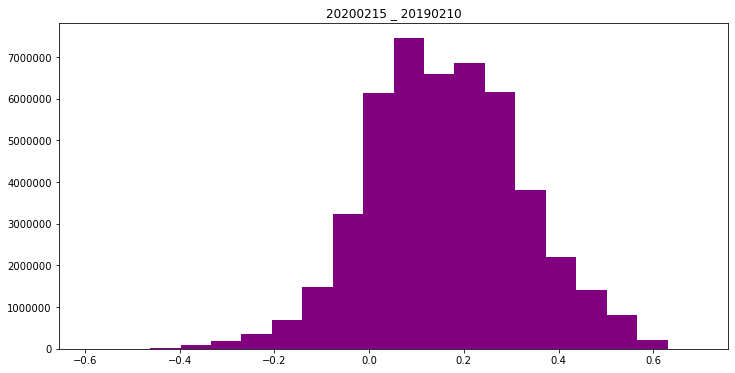

In [12]:
for i in range(len(krishna) - 1):
    dt = krishna[i + 1].split('\\')[-1].split('.')[0][-8:] + " _ " + krishna[i].split('\\')[-1].split('.')[0][-8:]
    differenceImage = calculateDifference(readImage(krishna[i]), readImage(krishna[i + 1]))
    imMap(dt, differenceImage)
    hist(dt, differenceImage)
    saveImage(rasterio.open(kscene), ksavepath_ndvi + "\\" + dt + ".tif", differenceImage)

C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


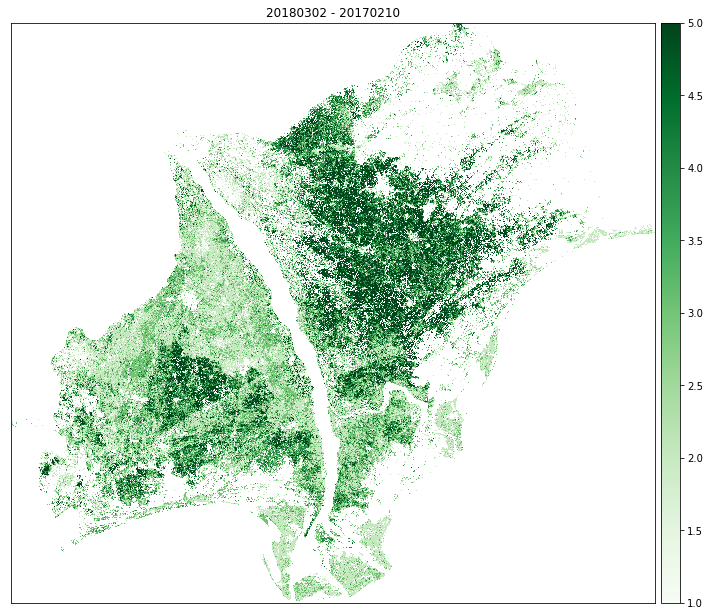

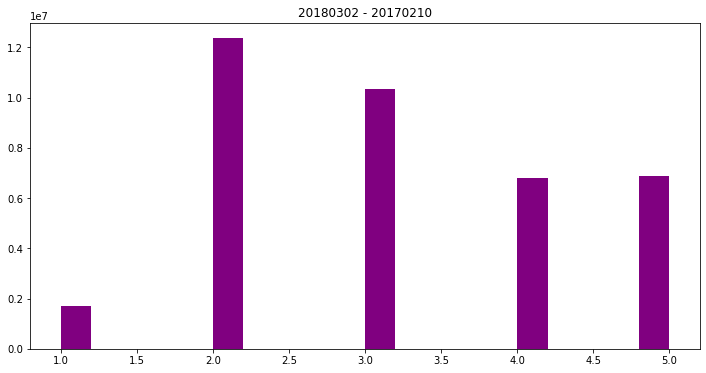

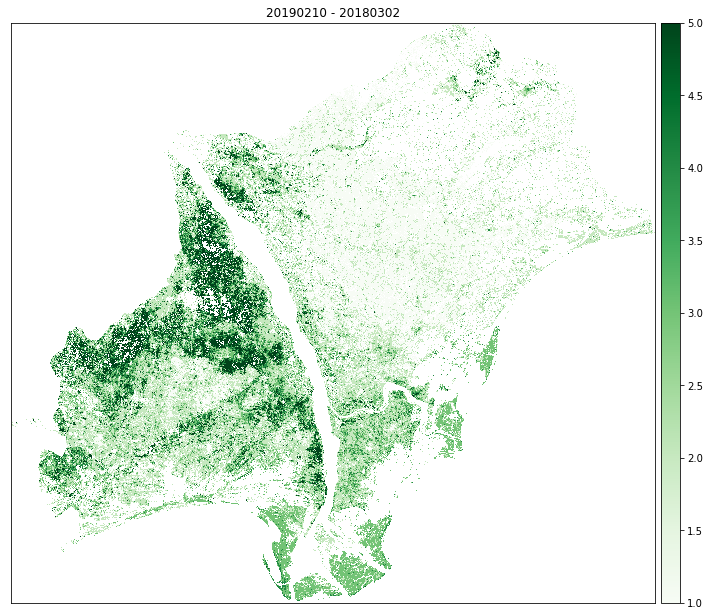

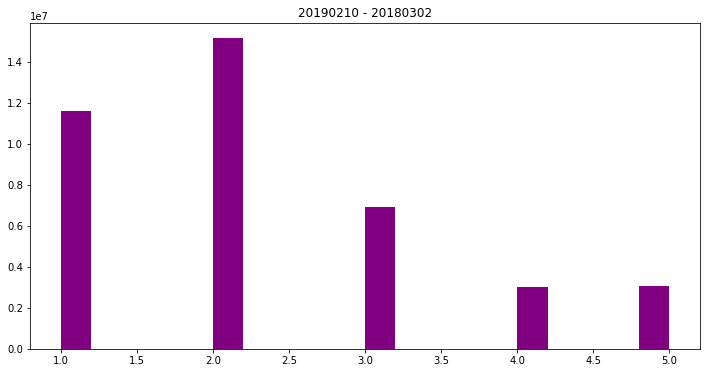

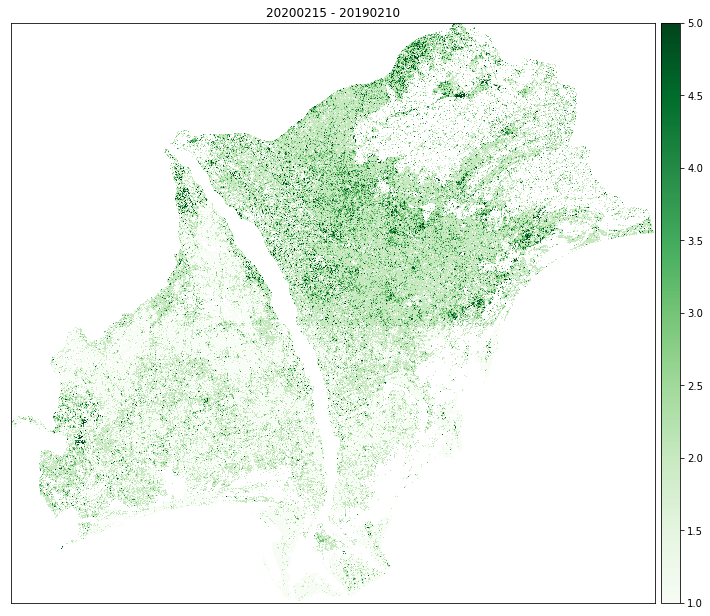

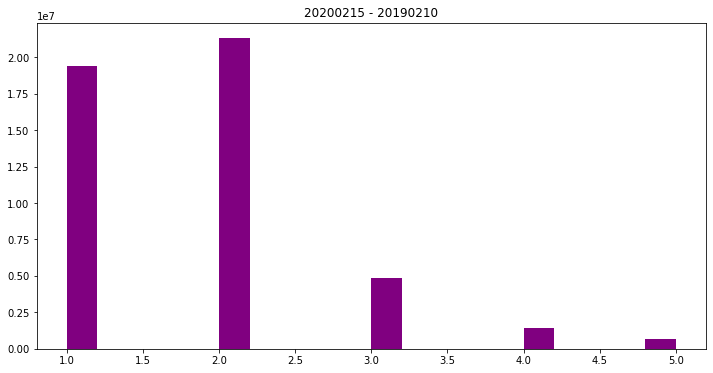

In [13]:
for i in range(len(krishna) - 1):
    dt = krishna[i + 1].split('\\')[-1].split('.')[0][-8:] + " - " + krishna[i].split('\\')[-1].split('.')[0][-8:]
    differenceImage = classifyDifference(readImage(krishna[i]), readImage(krishna[i + 1]))
    imMap(dt, differenceImage)
    hist(dt, differenceImage)
    saveImage(rasterio.open(kscene), ksavepath + "\\" + dt + ".tif", differenceImage)

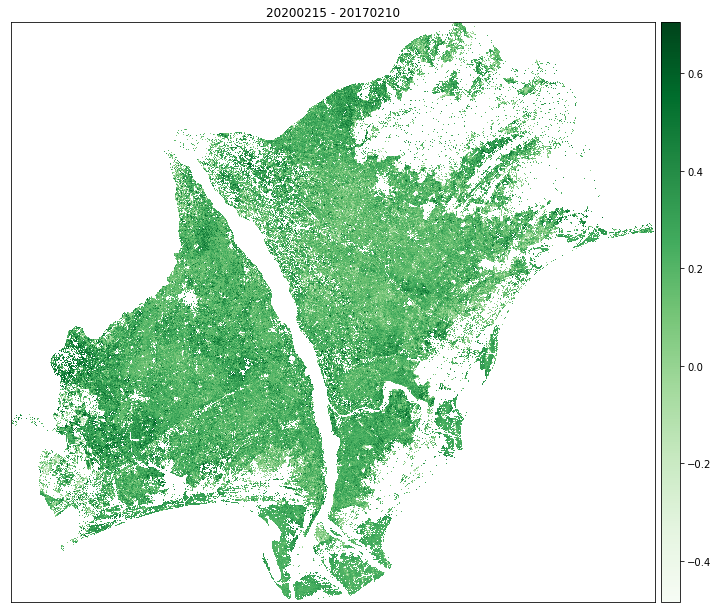

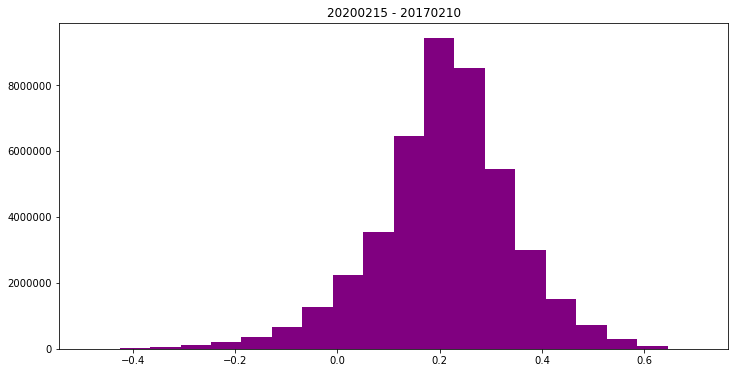

In [14]:
dt = krishna[-1].split('\\')[-1].split('.')[0][-8:] + " - " + krishna[0].split('\\')[-1].split('.')[0][-8:]
differenceImage = calculateDifference(readImage(krishna[0]), readImage(krishna[-1]))
imMap(dt, differenceImage)
hist(dt, differenceImage)
saveImage(rasterio.open(kscene), ksavepath_ndvi + "\\" + dt + ".tif", differenceImage)

C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


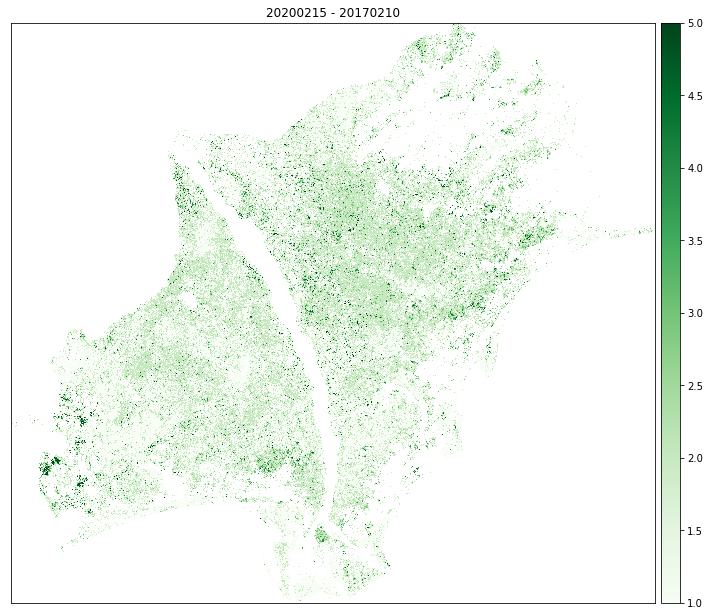

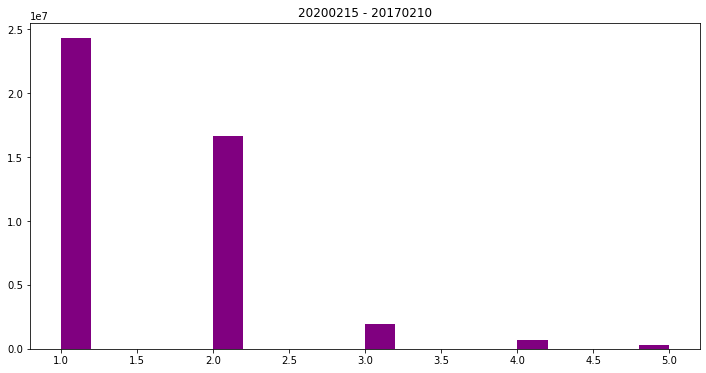

In [15]:
dt = krishna[-1].split('\\')[-1].split('.')[0][-8:] + " - " + krishna[0].split('\\')[-1].split('.')[0][-8:]
differenceImage = classifyDifference(readImage(krishna[0]), readImage(krishna[-1]))
imMap(dt, differenceImage)
hist(dt, differenceImage)
saveImage(rasterio.open(kscene), ksavepath + "\\" + dt + ".tif", differenceImage)

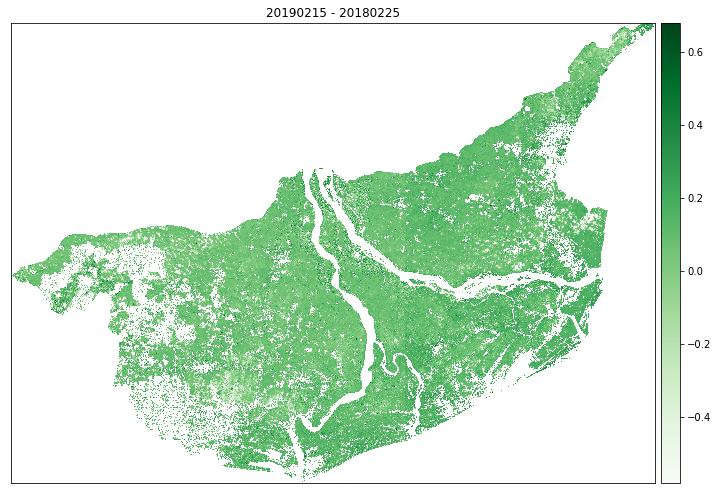

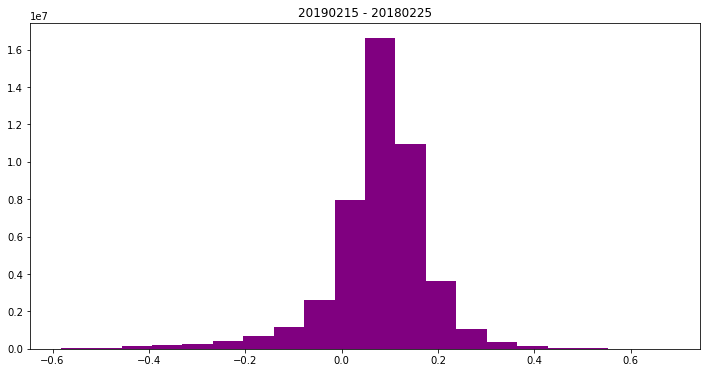

In [16]:
dt = godavari[-1].split('\\')[-1].split('.')[0][-8:] + " - " + godavari[0].split('\\')[-1].split('.')[0][-8:]
differenceImage = calculateDifference(readImage(godavari[0]), readImage(godavari[-1]))
imMap(dt, differenceImage)
hist(dt, differenceImage)
saveImage(rasterio.open(gscene), gsavepath_ndvi + "\\" + dt + ".tif", differenceImage)

C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


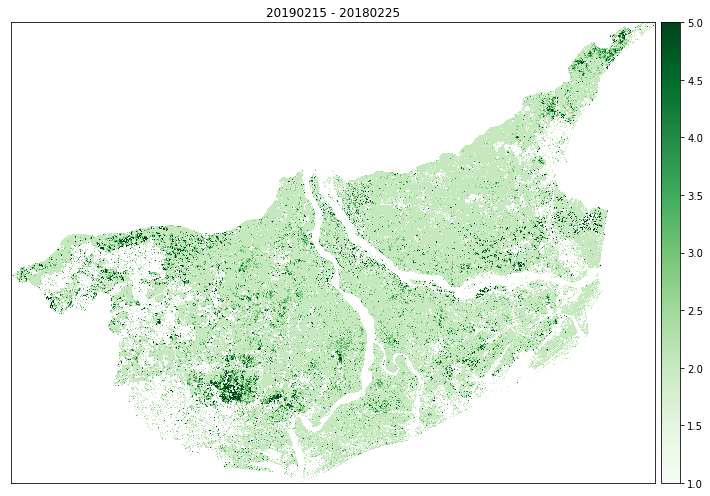

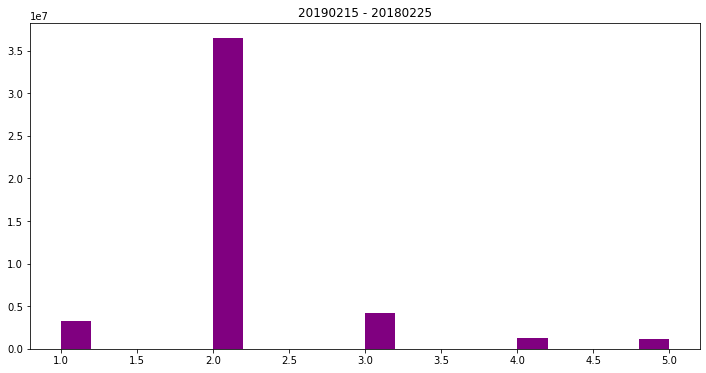

In [17]:
dt = godavari[-1].split('\\')[-1].split('.')[0][-8:] + " - " + godavari[0].split('\\')[-1].split('.')[0][-8:]
differenceImage = classifyDifference(readImage(godavari[0]), readImage(godavari[-1]))
imMap(dt, differenceImage)
hist(dt, differenceImage)
saveImage(rasterio.open(gscene), gsavepath + "\\" + dt + ".tif", differenceImage)